In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from os import getcwd
%matplotlib inline


baseDirectory = str(getcwd()).replace("\\", "/")
dataFilePath = baseDirectory + "\\..\\Dataset\\train.json"

data = pd.read_json(dataFilePath, encoding='utf8')

totalQuestion = pd.DataFrame([
    ['All Question', len(data)],
    ['Questions can be answered', len(data[data['label'] == True])],
    ['Questions can\'t be answered', len(data[data['label'] == False])],
], columns=['Total', '# Question'])

data.insert(
    len(data.columns),
    'Question Length',
    data['question'].apply(lambda p: len(p.split(' ')))
)

data.insert(
    len(data.columns),
    'Text Length',
    data['text'].apply(lambda p: len(p.split(' ')))
)

def sentenceCount(string):
    separators = ('?','!','.')
    defaultSep = separators[0]
    
    for sep in separators[1:]:
        string = string.replace(sep, defaultSep)
    sentences = [i.strip() for i in string.split(defaultSep)]
    if (sentences[-1] == ''):
        return len(sentences) - 1
    return len(sentences)

data.insert(
    len(data.columns),
    '# Text Sentences',
    data['text'].apply(lambda p: sentenceCount(p))
)

## The total # of questions, # of questions that can be answered & can't be answered

In [34]:
totalQuestion

,Total,# Question
0,All Question,18108
1,Questions can be answered,5738
2,Questions can't be answered,12370


## The distribution of question & paragraph length, max & min of question & paragraph length

In [35]:
data['Question Length'].describe()

count    18108.000000
mean        10.067815
std          3.100574
min          3.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         32.000000
Name: Question Length, dtype: float64

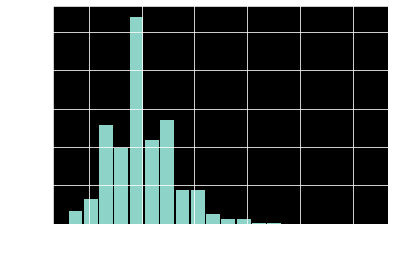

In [36]:
data['Question Length'].plot.hist(grid=True,bins=20, rwidth=0.9)
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.show()

In [37]:
data['Text Length'].describe()

count    18108.000000
mean        62.509057
std         41.978409
min          1.000000
25%         34.000000
50%         55.000000
75%         78.000000
max        594.000000
Name: Text Length, dtype: float64

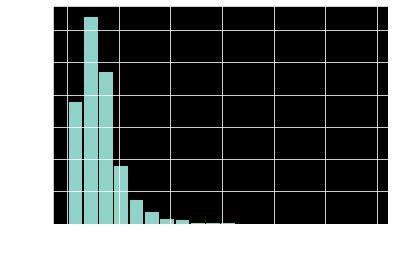

In [38]:
data['Text Length'].plot.hist(grid=True,bins=20, rwidth=0.9)
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.show()

## The distribution, max & min of the # of sentences in the paragraph

In [39]:
data['# Text Sentences'].describe()

count    18108.000000
mean         2.474928
std          1.898537
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         27.000000
Name: # Text Sentences, dtype: float64

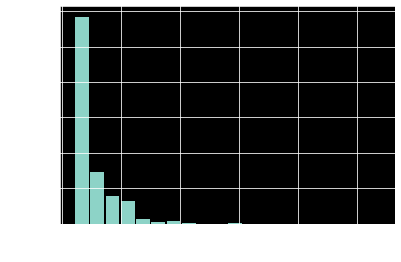

In [40]:
data['# Text Sentences'].plot.hist(grid=True,bins=20, rwidth=0.9)
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.show()